# 0. TO DO

* Change the path with os library to create a relative file path for the dataset (it is absolute atm)
* Move custom functions to a separate file + import (dtype check + histplot + description comparisons)
* Read Python documentation on modularization best practices
* Check if logic tbd inside jupyter or final report
* Recheck the comments to use corect terminology according to the book

# 1. LIBRARIES & DATA IMPORT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv(r"C:\Users\ernes\Desktop\GITHUB\diabetes_prediction\data_modeling\assets\data\TAIPEI_diabetes.csv")

# Creation of a deep copy of the original df
df_deep_copy = df.copy()

---
# 2. INITIAL DATA OVERVIEW

#### This phase is dedicated to general understanding of the data available on hand and identification of the following:
* general shape of the dataframe;
* features available for the prediction of our target variable;
* detecting NULL data points;
* columns' data types;
* check if the data point respects the data type of the column;
* duplicate values.

In [3]:
df.shape

(15000, 10)

In [5]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
df.tail(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
14990,1220763,5,169,83,31,60,49.004793,0.187397,53,1
14991,1603490,0,114,53,34,40,44.760534,0.143487,23,0
14992,1202654,3,48,60,24,81,29.417154,0.159605,42,1
14993,1165919,1,128,59,21,182,19.766514,0.167280,53,0
14994,1453189,0,72,99,32,32,20.932808,0.545038,22,0
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0
14999,1386396,3,114,65,47,512,36.215437,0.147363,34,1


In [3]:
# First check of the NULL data points inside the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [7]:
# Second check of the NULL values
df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [164]:
# A function that allows to check if the data points data types corresponds to their columns' data type
def dtype_per_column(df):
    for col in df.columns:
        print(f"{col}:")
        dtype_count = {}

        for i in df[col]:
            dtype_name = type(i).__name__
            if dtype_name in dtype_count:
                dtype_count[dtype_name] = dtype_count[dtype_name] + 1
            else:
                dtype_count[dtype_name] = 1

        for dtype_name in dtype_count:
            print(f"{dtype_name}: {str(dtype_count[dtype_name])}")
            print("\n")

In [165]:
dtype_per_column(df)

PatientID:
int: 15000


Pregnancies:
int: 15000


PlasmaGlucose:
int: 15000


DiastolicBloodPressure:
int: 15000


TricepsThickness:
int: 15000


SerumInsulin:
int: 15000


BMI:
float: 15000


DiabetesPedigree:
float: 15000


Age:
int: 15000


Diabetic:
int: 15000




In [9]:
# Check of the duplicated rows
duplicate_rows = df.duplicated().sum()

print(f"Total duplicated rows: {duplicate_rows}.")

Total duplicated rows: 0.


In [166]:
# Check of duplicated data points per column
def duplicate_cells_per_column(df):
    for col in df.columns:
        print(f"{col}: {df[col].duplicated().sum()}")

duplicate_cells_per_column(df)

PatientID: 105
Pregnancies: 14985
PlasmaGlucose: 14851
DiastolicBloodPressure: 14910
TricepsThickness: 14931
SerumInsulin: 14337
BMI: 0
DiabetesPedigree: 1
Age: 14944
Diabetic: 14998


#### INITIAL DATA OVERVIEW OBSERVATIONS

The studied dataset consists of 15 000 records in total.

It has 10 columns, with all of them being of a numerical data type (8x int64 and 2x float64).

The features are of numeric nature, both continuous and discrete. The predictor is a categorical, binary data type.
All the data points match the expected data types for their respective columns. Based on the preliminary notes documentation, these data types seem correct, given the nature of the features. Therefore, there is no need for type casting in order to normalize the data types.

The dataset contains no NULL values or duplicate rows, allowing us to explore it further during the EDA phase, without additional manipulations at this stage.

An interesting observation is that 105 PatientID values are duplicated, suggesting that some patients may have undergone multiple check-ups.

2/3 of the dataset contains non-diabetic patients records (predictor variable), which may lead to a class imbalance, where a machine learning model is better at predicting the non-diabetic patients, rather than the diabetic ones. An approach that might be helpful in this case would be resampling.

The target variable being of binary type will be encoded during the feature engineering phase.

---
# 3. EXPLORATORY DATA ANALYSIS (EDA)

#### This part is dedicated to:
* Explore the data more in detail.
* Detect the outliers and decide on how to treat them.
* Understand if the data on hand is better at predicting the diabetic or non-diabetic outcome.
* Take a closer look at the repeated PatientID to comprehend if some patient underwent multiple medial checkups.
* Explore the relationships between the features, and their correlation with the outcome predictor.
* Understand if we can and should develop additional features.

### 3.1 Univariate analysis of the dataset

In [12]:
# Division of the dataset into diabetic and non-diabetic dataframes
df_non_diabetic = df[df["Diabetic"] == 0]
df_diabetic = df[df["Diabetic"] == 1]

In [126]:
# A function that allows to generate and compare descriptive statistics for a specific column across multiple dataframes
def compare_statistics_per_col(dataframes, dataframes_names, column):
    descriptive_statistics = []
    
    for df in dataframes:
        statistics = df[column].describe()
        descriptive_statistics.append(statistics)
    
    result = pd.concat(descriptive_statistics, axis=1, keys=dataframes_names)

    print("---" * 10)
    print(f"Comparison of descriptive statistics for \x1B[4m{column}\x1B[0m:")
    print("---" * 10)
    return result

In [143]:
# A function that allows to generate and compare histograms for a specific column across multiple dataframes
def compare_histograms_per_col(dataframes, dataframes_names, column):

    n = len(dataframes)
    fig, axes = plt.subplots(ncols=n, nrows=1, figsize=(5 * n, 4))
    
    for i in range(n):
        ax = axes[i]
        df = dataframes[i]
        name = dataframes_names[i]
        sns.histplot(data=df, x=column, ax=ax, kde=True)
        ax.set_title(f"{name}")
    
    print("---" * 10)
    print(f"Comparison of data distributions for \x1B[4m{column}\x1B[0m:")
    print("---" * 10)
    
    plt.tight_layout()
    plt.show()

In [132]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Pregnancies")

------------------------------
Comparison of descriptive statistics for Pregnancies:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,3.224533,2.247900,5.177800
std,3.391020,3.130531,3.029063
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,2.000000,1.000000,5.000000
75%,6.000000,3.000000,8.000000
max,14.000000,11.000000,14.000000


------------------------------
Comparison of data distributions for Pregnancies:
------------------------------


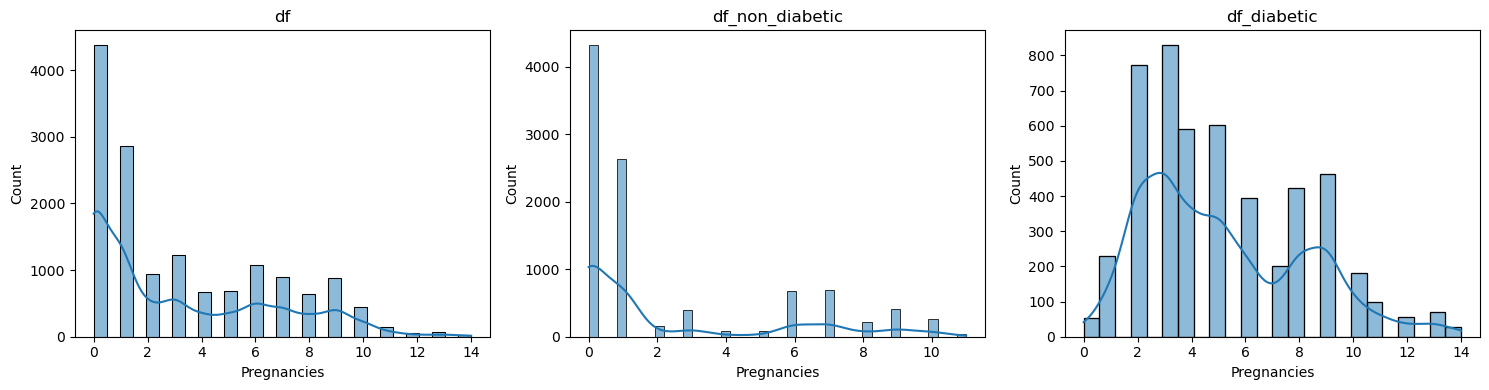

In [144]:
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Pregnancies")

In [138]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "PlasmaGlucose")

------------------------------
Comparison of descriptive statistics for PlasmaGlucose:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,107.856867,104.962200,113.646200
std,31.981975,32.076304,30.994844
min,44.000000,44.000000,44.000000
25%,84.000000,80.000000,98.000000
50%,104.000000,96.000000,108.000000
75%,129.000000,128.000000,131.250000
max,192.000000,189.000000,192.000000


------------------------------
Comparison of data distributions for PlasmaGlucose:
------------------------------


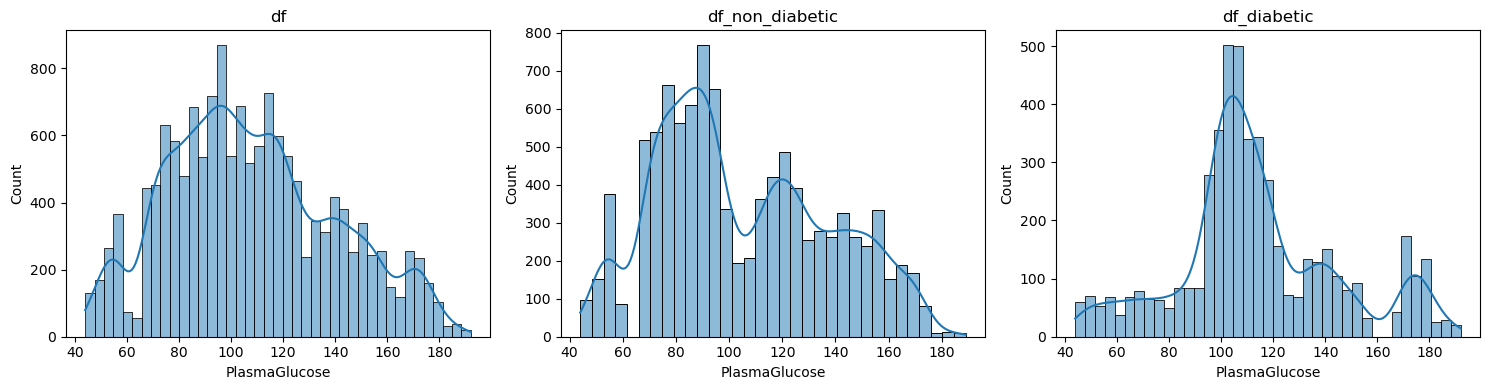

In [145]:
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "PlasmaGlucose")

In [147]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiastolicBloodPressure")

------------------------------
Comparison of descriptive statistics for DiastolicBloodPressure:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,71.220667,70.138700,73.384600
std,16.758716,17.704926,14.445041
min,24.000000,24.000000,24.000000
25%,58.000000,55.000000,63.000000
50%,72.000000,69.000000,74.000000
75%,85.000000,85.000000,85.000000
max,117.000000,117.000000,109.000000


------------------------------
Comparison of data distributions for DiastolicBloodPressure:
------------------------------


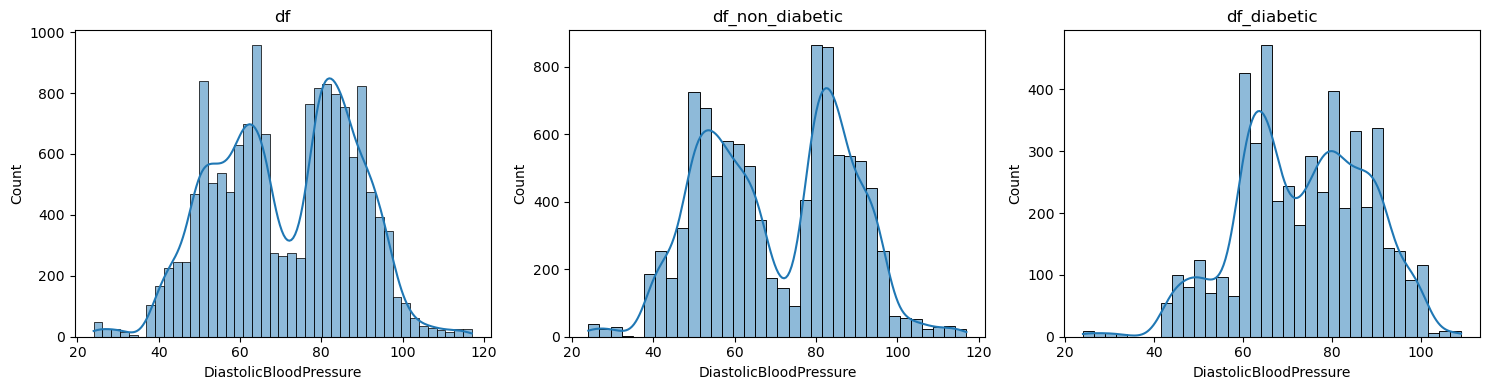

In [148]:
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiastolicBloodPressure")

In [149]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "TricepsThickness")

------------------------------
Comparison of descriptive statistics for TricepsThickness:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,28.814000,27.244400,31.953200
std,14.555716,13.906287,15.300269
min,7.000000,7.000000,7.000000
25%,15.000000,12.000000,21.000000
50%,31.000000,31.000000,29.000000
75%,41.000000,39.000000,44.000000
max,93.000000,57.000000,93.000000


------------------------------
Comparison of data distributions for TricepsThickness:
------------------------------


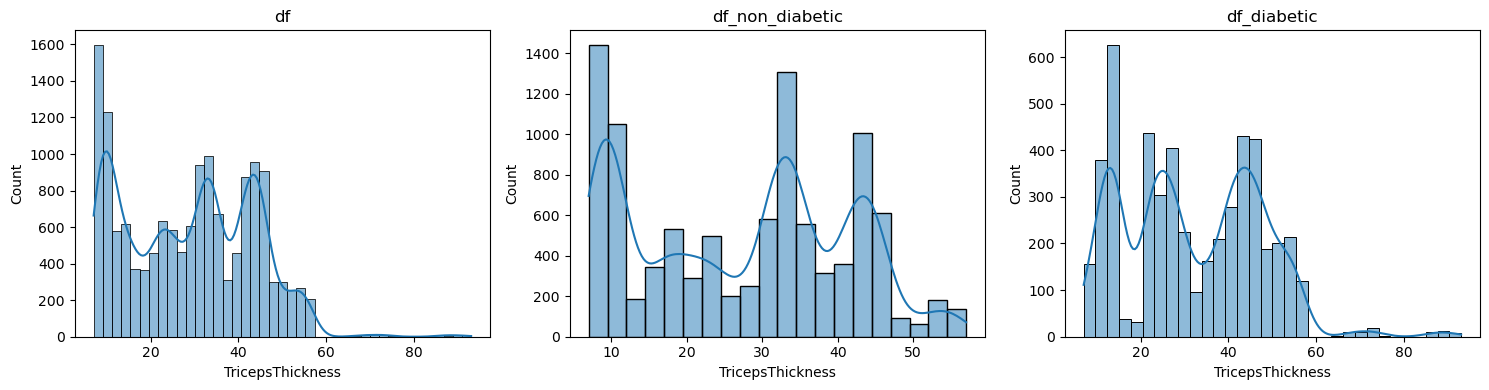

In [150]:
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "TricepsThickness")

In [135]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "BMI")

------------------------------
Comparison of descriptive statistics for BMI:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,31.509646,30.057052,34.414834
std,9.759000,10.093520,8.325321
min,18.200512,18.200512,18.218614
25%,21.259887,20.624081,28.642144
50%,31.767940,28.323487,33.716060
75%,39.259692,39.123578,39.737780
max,56.034628,51.418626,56.034628


------------------------------
Comparison of data distributions for BMI:
------------------------------


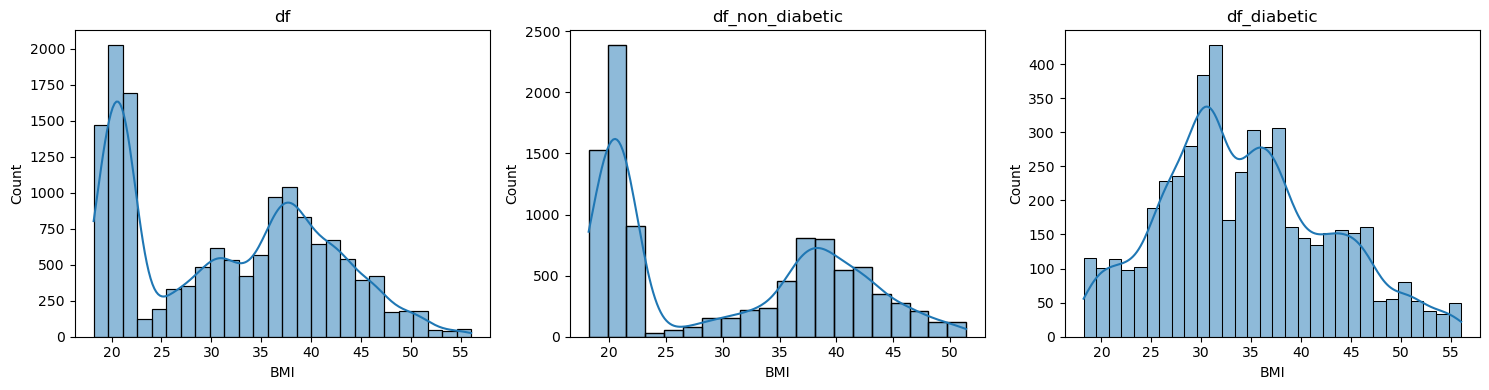

In [151]:
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "BMI")

In [134]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiabetesPedigree")

------------------------------
Comparison of descriptive statistics for DiabetesPedigree:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,0.398968,0.353457,0.489990
std,0.377944,0.331053,0.443775
min,0.078044,0.078044,0.078083
25%,0.137743,0.135498,0.143748
50%,0.200297,0.193486,0.222887
75%,0.616285,0.521379,0.774823
max,2.301594,2.215815,2.301594


------------------------------
Comparison of data distributions for DiabetesPedigree:
------------------------------


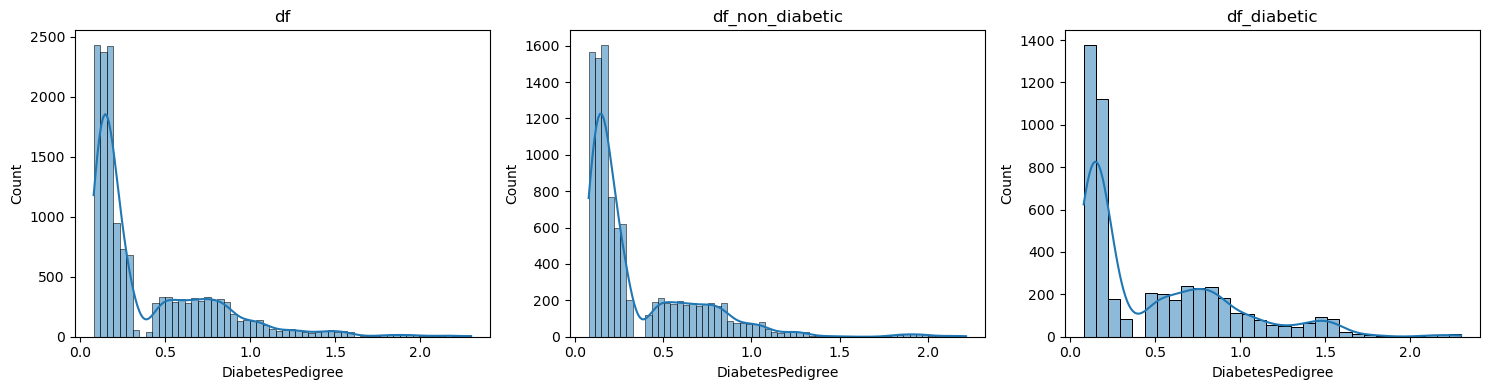

In [152]:
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "DiabetesPedigree")

In [133]:
compare_statistics_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Age")

------------------------------
Comparison of descriptive statistics for Age:
------------------------------


,df,df_non_diabetic,df_diabetic
count,15000.000000,10000.000000,5000.000000
mean,30.137733,27.209000,35.995200
std,12.089703,9.928463,13.780332
min,21.000000,21.000000,21.000000
25%,22.000000,22.000000,22.000000
50%,24.000000,24.000000,37.000000
75%,35.000000,26.000000,46.000000
max,77.000000,77.000000,67.000000


------------------------------
Comparison of data distributions for Age:
------------------------------


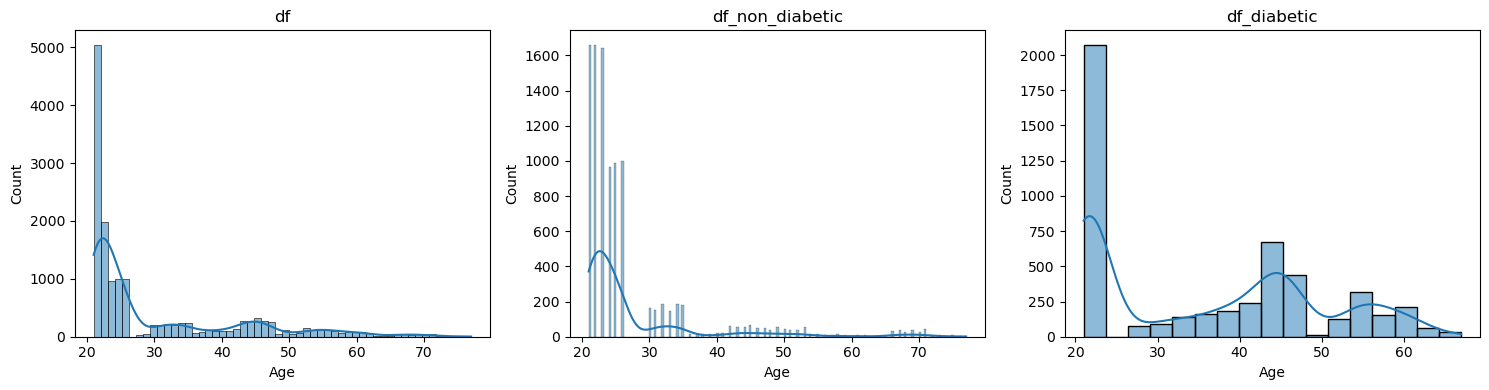

In [153]:
compare_histograms_per_col([df, df_non_diabetic, df_diabetic], ["df", "df_non_diabetic", "df_diabetic"], "Age")

In [167]:
# Check of the top 10 most frequent values per column in a dataframe
def top_10_frequent_values(df):
    for col in df:
        print(f"Top 10 most frequent values for \x1B[4m{col}\x1B[0m::")
        print(df[col].value_counts().head(10))
        print("\n")

In [168]:
top_10_frequent_values(df)

Top 10 most frequent values for PatientID::
PatientID
1321191    2
1772038    2
1693955    2
1951340    2
1104393    2
1015338    2
1460338    2
1459465    2
1733432    2
1567493    2
Name: count, dtype: int64


Top 10 most frequent values for Pregnancies::
Pregnancies
0    4377
1    2864
3    1219
6    1070
2     939
7     895
9     881
5     687
4     675
8     645
Name: count, dtype: int64


Top 10 most frequent values for PlasmaGlucose::
PlasmaGlucose
97     263
96     240
118    209
95     199
107    199
119    196
93     195
85     194
117    193
114    191
Name: count, dtype: int64


Top 10 most frequent values for DiastolicBloodPressure::
DiastolicBloodPressure
81    445
79    416
78    406
83    404
80    401
86    400
84    394
82    385
60    358
85    354
Name: count, dtype: int64


Top 10 most frequent values for TricepsThickness::
TricepsThickness
11    657
9     593
10    572
45    521
34    517
7     511
8     493
44    488
31    481
35    481
Name: count, dtype: int64


#### Univariate statistical observations of the features:

* Pregnancies: 

* Plasma Glucose: 

* Diastolic Blood Pressure: 

* Triceps Thickness: 

* Serum Insulin: 

* BMI: 

* Diabetes Pedigree: 

* Age: 



#### Diabetic vs non-diabetic groups observations:

* **Diabetic patients tend to have more pregnancies** on average compared to non-diabetic patients (2.25 vs 5.18).

* **Diabetic group has a slightly higher Plasma Glucose levels** than non-diabetic group (104.96 vs 113.65).

* **Diabetic group has a slightly higher Diastolic Blood Pressure levels** than non-diabetic group (70.14 vs 73.38).

* Higher glucose levels are observed in diabetics compared to non-diabetics ()

* Blood pressure is generally higher in diabetics compared to non-diabetics

* Diabetic patients tend to have thicker skinfolds, which may indicate higher fat distribution

* Diabetics have significantly higher insulin levels, likely due to insulin resistance

* Diabetics have a higher BMI, suggesting a link between obesity and diabetes

* Higher genetic risk is associated with diabetes

* Diabetic patients are generally older, as diabetes risk increases with age


### 3.2 Bivariate analysis of the dataset

In [169]:
# Bivariate analysis with a correlation matrix
df.corr()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,1.000000,0.006774,-0.001858,0.008746,-0.002406,-0.020698,-0.003156,-0.015413,-0.007096,-0.012494
Pregnancies,0.006774,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,-0.001858,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.008746,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,-0.002406,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,-0.020698,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,-0.003156,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,-0.015413,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,-0.007096,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,-0.012494,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


<Axes: >

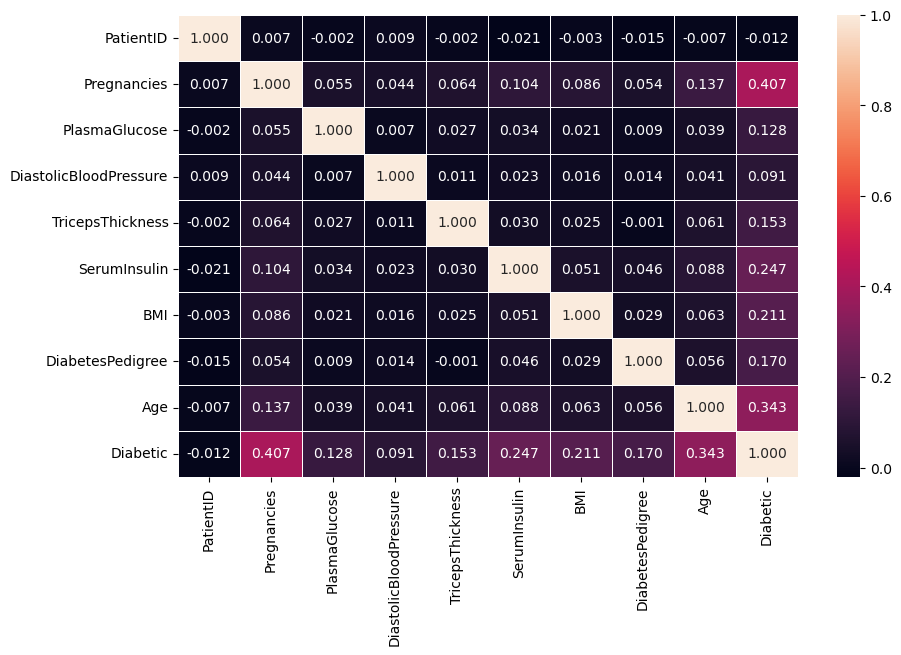

In [ ]:
# Bivariate analysis using a heatmap correlation matrix

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidths=.5, ax=ax)

Correlation matrix - helps to find the relationship between features (columns that predict the target value) and the target (column that solves the problem to be predicted)

Strongest Diabetic Correlation relationships : 
- Pregancies (0.41)
- Age (0.34)
- Seruminsulin (0.25)
- BMI (0.21)
- DiabetesPedigree (0.17)
- Triceps Thickness (0.15)
- PlasmaGlucose (0.13)
- DiastolicBloodPressure (0.1)


The positive correlation hints to us that all of the above meantioned features have a positive relationship to our target value (Diabetes), meaning that as they increase, the possibility of having a diabetes increases as well.


Strongest correlation is the number of pregnancies, the more pregnancies, higher the chance to get diabetes.

### 3.3 Multivariate analysis

### 3.4 Closer look at the repeated PatientID

- How many non-diabetic -> diabetic and vice versa ?

### 3.5 Outliers detection

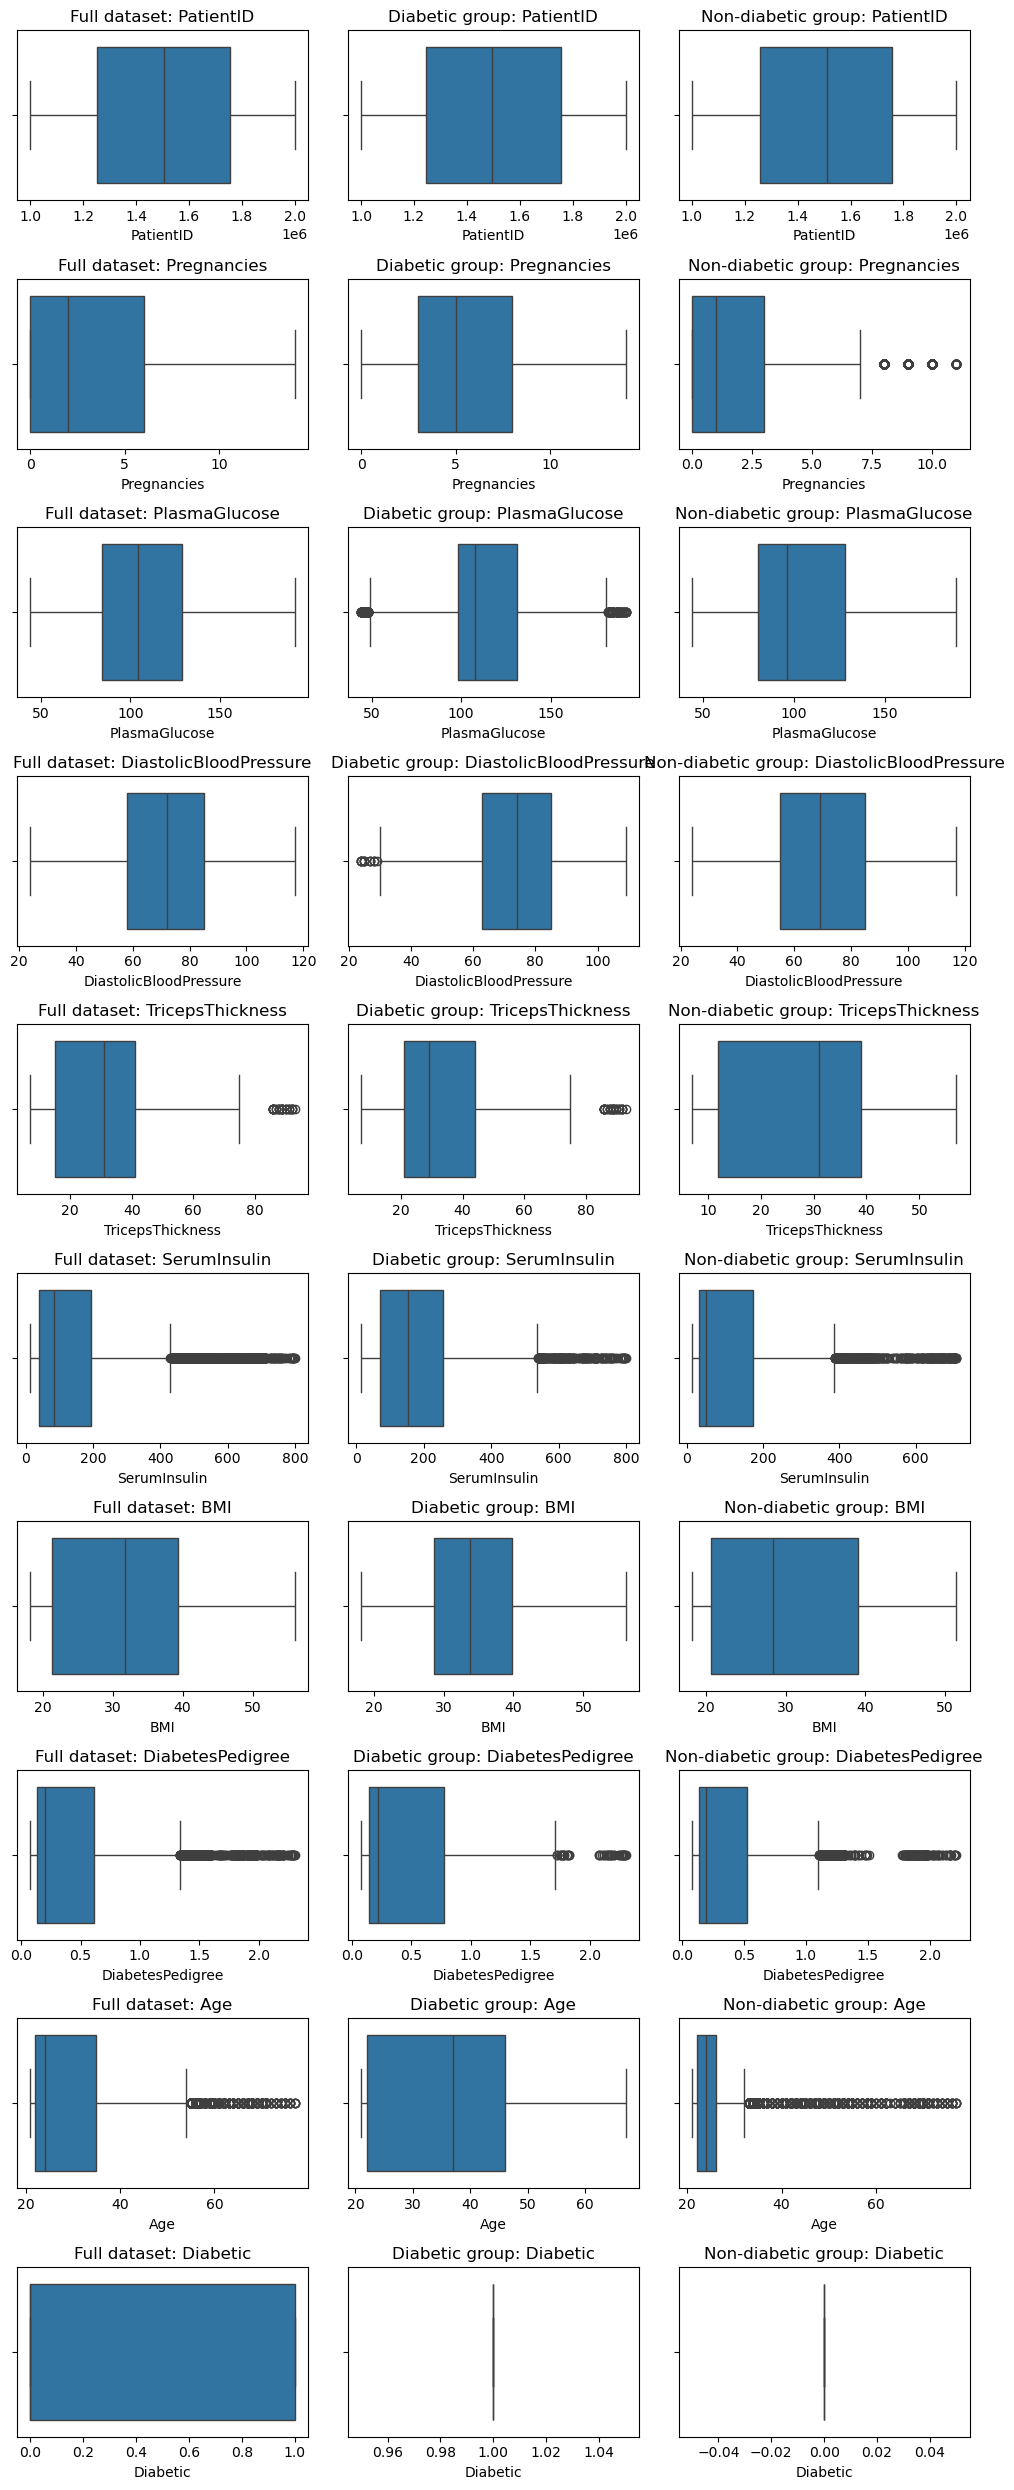

In [171]:
# Data distributions across the columns for the whole dataframe vs diabetic & non-diabetic groups
columns = df.columns
nb_rows = len(columns)

fig, axes = plt.subplots(ncols=3, nrows=nb_rows, figsize=(10, 25))

for i, col in enumerate(columns):

    sns.boxplot(data=df, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"Full dataset: {col}")
    
    sns.boxplot(data=df_diabetic, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f"Diabetic group: {col}")
    
    sns.boxplot(data=df_non_diabetic, x=col, ax=axes[i, 2])
    axes[i, 2].set_title(f"Non-diabetic group: {col}")

plt.tight_layout()
plt.show()

# 4. Feature Engineering

Goals : 
* Feature selection
* Data normalization
    * Continuous values binning ?
    * class imbalances - SMOTE ?
* Outliers treatment
    * cap the outliers to min and max values, but be smart about it like titanic example - winsorization ?
* Data encoding
* False positive vs false negative? - rather positive, because of the context, but needs to be more argumented
    * Using class weights may lead to have slightly more false positives, but that's okay in this context.

# 5. MODELS EVALUATION